In [1]:
### Instantiating a small convnet

from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

C:\Users\gugat\PycharmProjects\PUC\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Importante: uma convnet recebe tensores como entrada com forma `(altura_da_imagem, largura_da_imagem, canais_da_imagem)` (não incluindo a dimensão do lote). Neste caso, configuraremos a convnet para processar entradas de tamanho `(28, 28, 1)`, que é o formato das imagens do MNIST. Faremos isso passando o argumento `input_shape=(28, 28, 1)` para a primeira camada.
Vamos exibir a arquitetura da convnet até agora:

In [2]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

A saída de cada camada `Conv2D` e `MaxPooling2D` é um tensor 3D com forma `(altura, largura, canais)`. As dimensões de largura e altura tendem a diminuir à medida que você avança na rede. O número de canais é controlado pelo primeiro argumento passado para as camadas `Conv2D` (32 ou 64).

O próximo passo é alimentar o último tensor de saída (com forma `(3, 3, 64)`) em uma rede classificadora densamente conectada, como aquelas com as quais você já está familiarizado: um conjunto de camadas `Dense`. Esses classificadores processam vetores, que são 1D, enquanto a saída atual é um tensor 3D. Primeiro, precisamos achatar as saídas 3D para 1D e depois adicionar algumas camadas `Dense` no topo.

In [3]:
### Adding a classifier on top of the convnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
### Training the convnet on MNIST images

from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Separando dados de validação
val_len = 10000
train_len = 50000
test_len = 10000
val_images = train_images[:val_len]
val_labels = train_labels[:val_len]
train_images = train_images[val_len:]
train_labels = train_labels[val_len:]

train_images_new = train_images.reshape((train_len, 28, 28, 1))
train_images_new = train_images_new.astype('float32') / 255


train_images_old = train_images.reshape((train_len, 28 * 28))
train_images_old = train_images_old.astype('float32') / 255

test_images_old = test_images.reshape((test_len, 28 * 28))
test_images_old = test_images_old.astype('float32') / 255

test_images_new = test_images.reshape((test_len, 28, 28, 1))
test_images_new = test_images_new.astype('float32') / 255


val_images_new = val_images.reshape((val_len, 28, 28, 1))
val_images_new = val_images_new.astype('float32') / 255

val_images_old = val_images.reshape((val_len, 28 * 28))
val_images_old = val_images_old.astype('float32') / 255

val_labels = to_categorical(val_labels)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(train_images_new, train_labels, epochs=5, batch_size=64, validation_data=(val_images_new, val_labels))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8553 - loss: 0.4606 - val_accuracy: 0.9794 - val_loss: 0.0695
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9833 - loss: 0.0554 - val_accuracy: 0.9853 - val_loss: 0.0496
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9887 - loss: 0.0358 - val_accuracy: 0.9872 - val_loss: 0.0436
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9914 - loss: 0.0271 - val_accuracy: 0.9858 - val_loss: 0.0509
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9936 - loss: 0.0191 - val_accuracy: 0.9872 - val_loss: 0.0480


In [6]:
model.evaluate(test_images_new, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9847 - loss: 0.0561


[0.040430713444948196, 0.9890999794006348]

**Exercício**

1. Compare a acurácia deste modelo com o do modelo desenvolvido anteriormente para a mesma base de dados. Faça gráficos para mostrar a melhoria do modelo atual em relação ao anterior.
2. Retire as camadas de MaxPooling e compare o resultado do modelo anterior
3. Em vez de MaxPooling, utilize AveragePooling2D e compare o resultado com o modelo anterior

In [7]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_old = network.fit(train_images_old, train_labels, epochs=5, batch_size=128, validation_data=(val_images_old, val_labels))
network.evaluate(test_images_old, test_labels)

Epoch 1/5


C:\Users\gugat\PycharmProjects\PUC\venv\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8642 - loss: 0.4745 - val_accuracy: 0.9522 - val_loss: 0.1575
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9641 - loss: 0.1277 - val_accuracy: 0.9608 - val_loss: 0.1247
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9776 - loss: 0.0783 - val_accuracy: 0.9719 - val_loss: 0.0920
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9845 - loss: 0.0556 - val_accuracy: 0.9742 - val_loss: 0.0892
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9873 - loss: 0.0437 - val_accuracy: 0.9747 - val_loss: 0.0799
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9730 - loss: 0.0867


[0.07471563667058945, 0.9765999913215637]

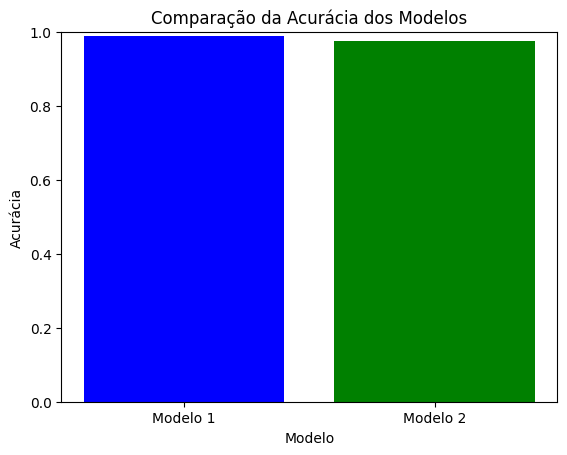

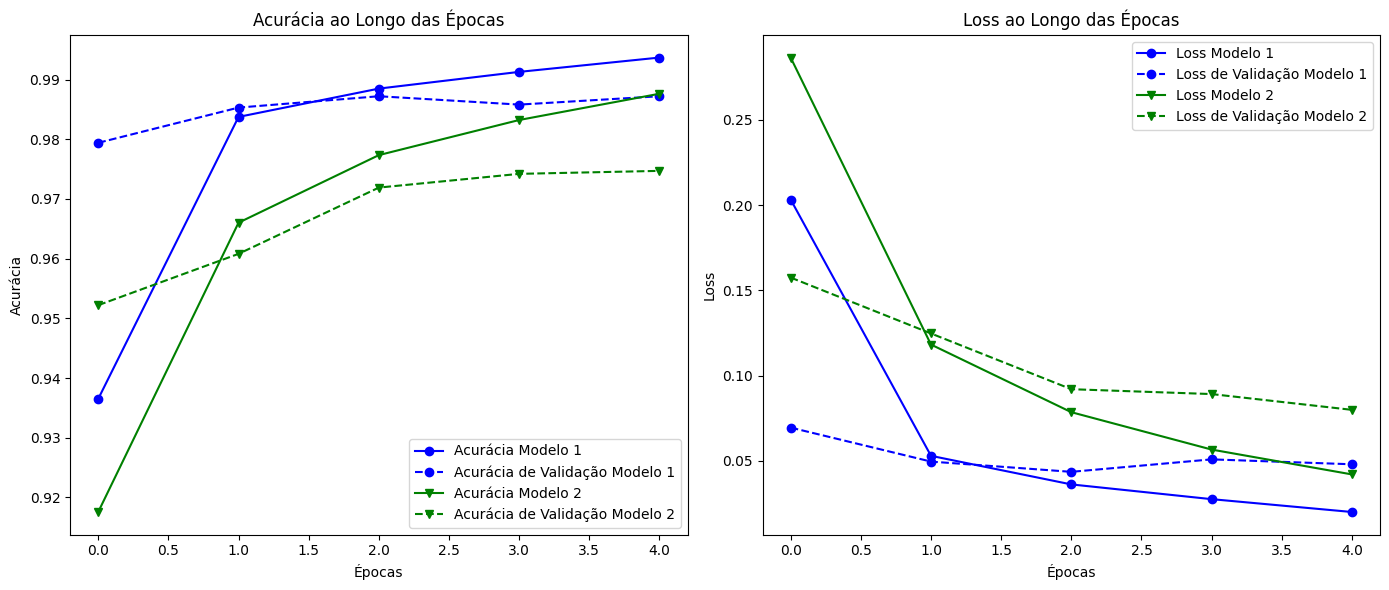

In [9]:
import matplotlib.pyplot as plt

def plot_history(histories, labels):
    colors = ['blue', 'green']
    markers = ['o', 'v']
    
    plt.figure(figsize=(14, 6))
    
    # Plot acurácia
    plt.subplot(1, 2, 1)
    for history, label, color, marker in zip(histories, labels, colors, markers):
        plt.plot(history.history['accuracy'], label=f'Acurácia {label}', color=color, marker=marker)
        plt.plot(history.history['val_accuracy'], label=f'Acurácia de Validação {label}', linestyle='--', color=color, marker=marker)
    plt.title('Acurácia ao Longo das Épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    for history, label, color, marker in zip(histories, labels, colors, markers):
        plt.plot(history.history['loss'], label=f'Loss {label}', color=color, marker=marker)
        plt.plot(history.history['val_loss'], label=f'Loss de Validação {label}', linestyle='--', color=color, marker=marker)
    plt.title('Loss ao Longo das Épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def compare_models(model1, model2, history1, history2, x_test1, x_test2, y_test):
    # Avaliar os modelos com seus respectivos dados de teste
    scores1 = model1.evaluate(x_test1, y_test, verbose=0)
    scores2 = model2.evaluate(x_test2, y_test, verbose=0)
    
    # Plotar as acurácias em um gráfico de barras
    plt.bar(['Modelo 1', 'Modelo 2'], [scores1[1], scores2[1]], color=['blue', 'green'])
    plt.xlabel('Modelo')
    plt.ylabel('Acurácia')
    plt.title('Comparação da Acurácia dos Modelos')
    plt.ylim([0, 1])
    plt.show()

    # Plotar históricos de treinamento
    plot_history([history1, history2], ['Modelo 1', 'Modelo 2'])

# Modelo um é o novo e o dois é o antigo
compare_models(model, network, history, history_old, test_images_new, test_images_old, test_labels)

#### Gráfico de Acurácia:

O Modelo 1 apresenta uma acurácia mais alta em comparação com o Modelo 2, tanto no treinamento quanto na validação.
A acurácia do Modelo 1 também parece mais estável na validação, o que pode indicar que ele generaliza melhor para dados não vistos durante o treinamento.
O Modelo 2, embora comece com uma acurácia menor, mostra uma melhoria constante ao longo do tempo, sugerindo que mais épocas de treinamento poderiam ser benéficas.

<br>

#### Gráfico de Loss:
O Modelo 1 tem uma função de perda significativamente mais baixa do que o Modelo 2 tanto no conjunto de treinamento quanto no de validação. Isso sugere que o Modelo 1 tem um melhor desempenho em aprender a tarefa em questão.
Para o Modelo 1, a loss de validação é quase tão baixa quanto a loss de treinamento, o que é um bom sinal de que o modelo não está sofrendo de overfitting.
O Modelo 2 apresenta uma redução na loss ao longo do tempo, mas ainda assim fica atrás do Modelo 1 em termos de desempenho.

In [10]:
# Modelo sem max pooling
model_no_max_pooling = models.Sequential()
model_no_max_pooling.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model_no_max_pooling.add(layers.MaxPooling2D((2, 2)))
model_no_max_pooling.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_no_max_pooling.add(layers.MaxPooling2D((2, 2)))
model_no_max_pooling.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pooling.add(layers.Flatten())
model_no_max_pooling.add(layers.Dense(64, activation='relu'))
model_no_max_pooling.add(layers.Dense(10, activation='softmax'))
model_no_max_pooling.summary()

C:\Users\gugat\PycharmProjects\PUC\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 22, 22, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     1,982,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,038,922 (7.78 MB)

 Trainable params: 2,038,922 (7.78 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_no_max_pooling.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_no_max_pooling = model_no_max_pooling.fit(train_images_new, train_labels, epochs=5, batch_size=64, validation_data=(val_images_new, val_labels))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.9026 - loss: 0.3151 - val_accuracy: 0.9796 - val_loss: 0.0716
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.9865 - loss: 0.0444 - val_accuracy: 0.9832 - val_loss: 0.0597
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.9932 - loss: 0.0238 - val_accuracy: 0.9876 - val_loss: 0.0472
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9948 - loss: 0.0167 - val_accuracy: 0.9869 - val_loss: 0.0541
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.9968 - loss: 0.0100 - val_accuracy: 0.9854 - val_loss: 0.0725


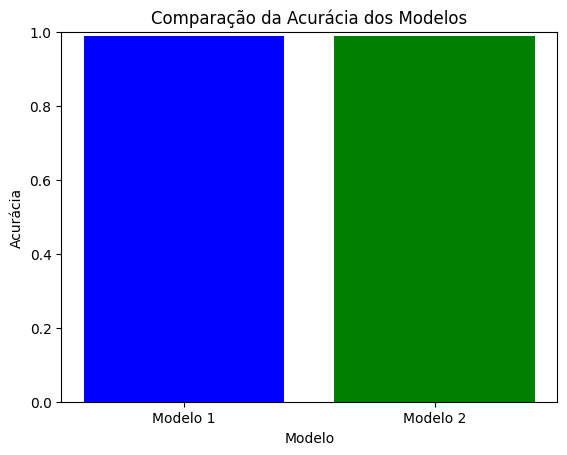

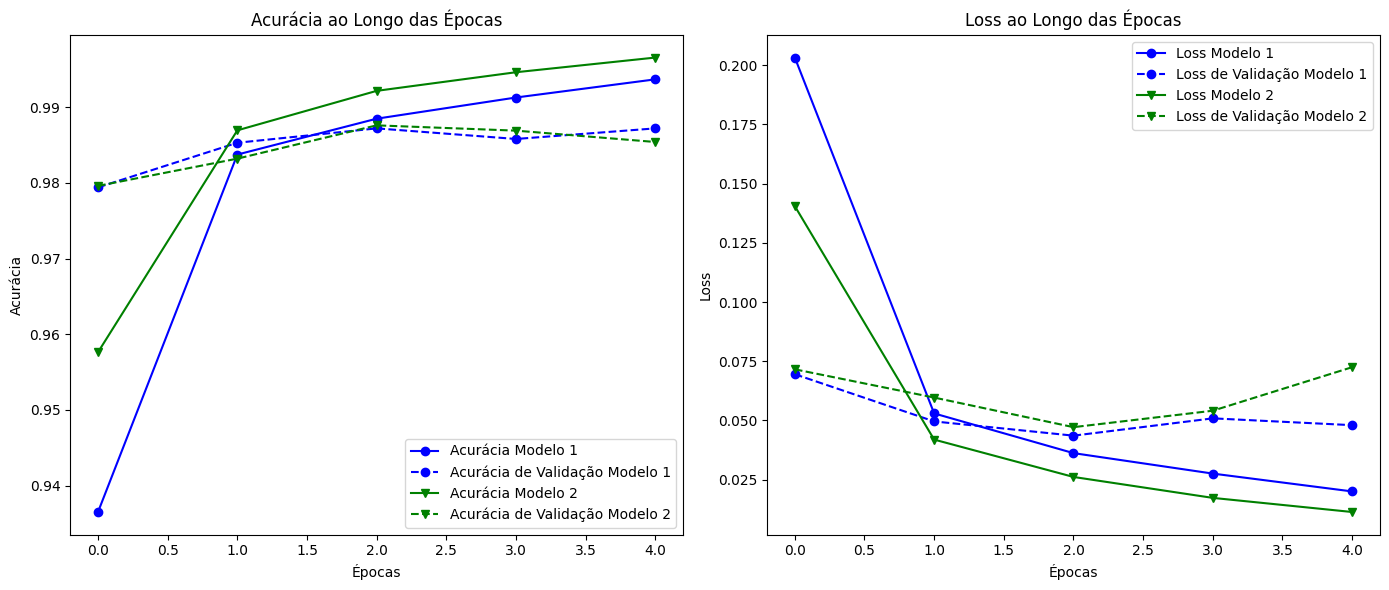

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9857 - loss: 0.0659
[0.047964975237846375, 0.9891999959945679]


In [15]:
compare_models(model, model_no_max_pooling, history, history_no_max_pooling, test_images_new, test_images_new, test_labels)

In [23]:
model_no_max_pooling.evaluate(val_images_new, val_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9849 - loss: 0.0837


[0.07272384315729141, 0.9854000210762024]

#### Gráfico de Acurácia:

Tanto o Modelo 1 quanto o Modelo 2 parecem convergir para valores de acurácia bastante elevados, ambos alcançando valores acima de 0.98.
O Modelo 1 apresenta acurácia ligeiramente superior no conjunto de validação, sugerindo uma ligeira vantagem em termos de generalização.
O Modelo 2 tem uma trajetória de acurácia de validação mais volátil, o que pode indicar alguma variação na performance ao longo das épocas o que pode indicar um overfitting.

<br>

#### Gráfico de Loss:

Ambos os modelos mostram uma rápida diminuição na loss durante as primeiras épocas, o que é típico do início do treinamento quando os pesos do modelo estão se ajustando às características principais dos dados.
O Modelo 1 exibe uma loss de treinamento consistentemente baixa e uma loss de validação que acompanha de perto, indicando bom ajuste e generalização.
O Modelo 2, por outro lado, mostra uma discrepância maior entre a loss de treinamento e a de validação, especialmente na terceira época. Isso pode sugerir que o modelo está começando a superestimar as características dos dados de treinamento, ou seja, começando a sofrer de overfitting.

In [18]:
# Modelo sem AveragePooling2D
model_average_pooling = models.Sequential()
model_average_pooling.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_average_pooling.add(layers.AveragePooling2D((2, 2)))
model_average_pooling.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_average_pooling.add(layers.AveragePooling2D((2, 2)))
model_average_pooling.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_average_pooling.add(layers.Flatten())
model_average_pooling.add(layers.Dense(64, activation='relu'))
model_average_pooling.add(layers.Dense(10, activation='softmax'))
model_average_pooling.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 13, 13, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model_average_pooling.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_average_pooling = model_average_pooling.fit(train_images_new, train_labels, epochs=5, batch_size=64, validation_data=(val_images_new, val_labels))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8318 - loss: 0.5302 - val_accuracy: 0.9353 - val_loss: 0.2150
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9777 - loss: 0.0738 - val_accuracy: 0.9800 - val_loss: 0.0685
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9852 - loss: 0.0484 - val_accuracy: 0.9785 - val_loss: 0.0713
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9890 - loss: 0.0347 - val_accuracy: 0.9807 - val_loss: 0.0651
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9914 - loss: 0.0279 - val_accuracy: 0.9834 - val_loss: 0.0584


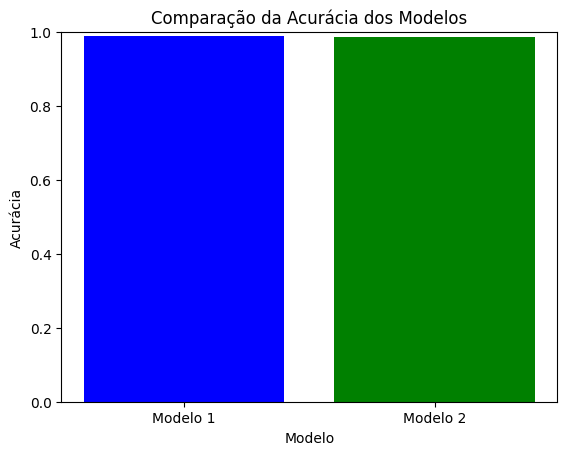

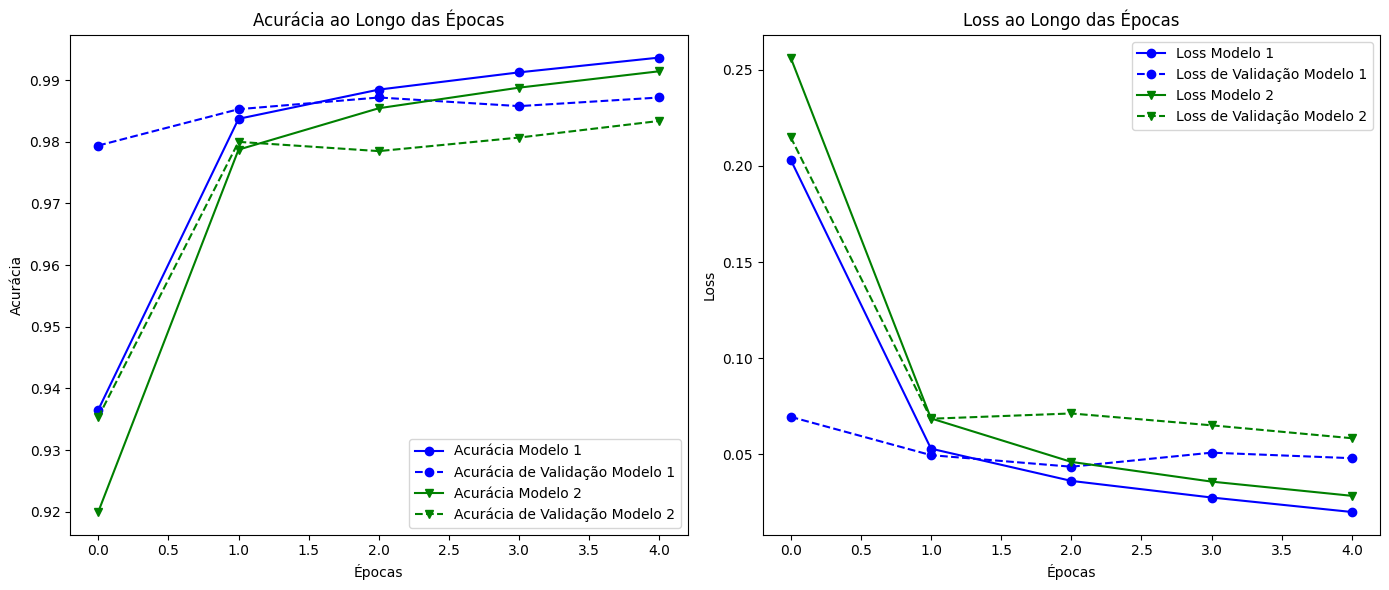

In [20]:
compare_models(model, model_average_pooling, history, history_average_pooling, test_images_new, test_images_new, test_labels)

In [22]:
model_average_pooling.evaluate(val_images_new, val_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9828 - loss: 0.0586


[0.0585724413394928, 0.9833999872207642]

#### Gráfico de Acurácia:

O Modelo 1 começa com uma acurácia mais baixa do que o Modelo 2, mas rapidamente supera e mantém a liderança por todas as épocas subsequentes. Isso sugere uma aprendizagem inicial mais rápida ou eficiente do Modelo 1.
Ambos os modelos parecem atingir um platô na acurácia, com o Modelo 1 estabilizando em uma acurácia mais alta, indicando uma possível melhor generalização deste modelo em comparação ao Modelo 2.

<br>

#### Gráfico de Loss:

O Modelo 2 começa com uma função de perda significativamente maior do que o Modelo 1, mas rapidamente melhora. Apesar dessa melhoria inicial rápida, o Modelo 2 ainda tem uma perda maior comparado ao Modelo 1 ao longo de todas as épocas.
A perda de validação do Modelo 2 é mais volátil, sugerindo que esse modelo pode ser menos estável durante o treinamento em comparação ao Modelo 1, que mostra uma perda de validação consistente e baixa ao longo das épocas.